# This session is based on searching for the Higgs boson Data

Load Libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import awkward as ak
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import shap
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

from sklearn.utils import shuffle

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

We have two datasets for this tast: 
* **Training data**: Which is the data that will be used to trian the model and test its performance.
* **Testing data**: This is the data that will be used to check the performance of the model. this is unseen data to the model.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

Id Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  \
0       100000          s       138.470                       51.655   
1       100001          b       160.937                       68.768   
2       100002          b      -999.000                      162.172   
3       100003          b       143.905                       81.417   
4       100004          b       175.864                       16.915   
...        ...        ...           ...                          ...   
249995  349995          b      -999.000                       71.989   
249996  349996          b      -999.000                       58.179   
249997  349997          s       105.457                       60.526   
249998  349998          b        94.951                       19.362   
249999  349999          b      -999.000                       72.756   

        DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
0             97.827    27.980                  0.91           124.711   
1            103.235    48.146               -999.00          -999.000   
2            125.953    35.635               -999.00          -999.000   
3             80.943     0.414               -999.00          -999.000   
4            134.805    16.405               -999.00          -999.000   
...              ...       ...                   ...               ...   
249995        36.548     5.042               -999.00          -999.000   
249996        68.083    22.439               -999.00          -999.000   
249997        75.839    39.757               -999.00          -999.000   
249998        68.812    13.504               -999.00          -999.000   
249999        70.831     7.479               -999.00          -999.000   

        DER_prodeta_jet_jet  DER_deltar_tau_lep  ...  PRI_met_phi  \
0                     2.666               3.064  ...       -0.277   
1                  -999.000               3.473  ...       -1.916   
2                  -999.000               3.148  ...       -2.186   
3                  -999.000               3.310  ...        0.060   
4                  -999.000               3.891  ...       -0.871   
...                     ...                 ...  ...          ...   
249995             -999.000               1.392  ...        2.859   
249996             -999.000               2.585  ...       -0.867   
249997             -999.000               2.390  ...       -2.890   
249998             -999.000               3.365  ...        0.811   
249999             -999.000               2.025  ...       -1.596   

        PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0             258.733            2              67.435                2.150   
1             164.546            1              46.226                0.725   
2             260.414            1              44.251                2.053   
3              86.062            0            -999.000             -999.000   
4              53.131            0            -999.000             -999.000   
...               ...          ...                 ...                  ...   
249995        144.665            0            -999.000             -999.000   
249996         80.408            0            -999.000             -999.000   
249997        198.907            1              41.992                1.800   
249998        112.718            0            -999.000             -999.000   
249999         99.405            0            -999.000             -999.000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                     0.444                 46.062                    1.24   
1                     1.158               -999.000                 -999.00   
2                    -2.028               -999.000                 -999.00   
3                  -999.000               -999.000                 -999.00   
4                  -999.000               -999.000                 -999.00   
...         

The data above has 250000 Rows and 32 columns.

In [4]:
df.columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           250000 non-null  int64  
 1   Prediction                   250000 non-null  object 
 2   DER_mass_MMC                 250000 non-null  float64
 3   DER_mass_transverse_met_lep  250000 non-null  float64
 4   DER_mass_vis                 250000 non-null  float64
 5   DER_pt_h                     250000 non-null  float64
 6   DER_deltaeta_jet_jet         250000 non-null  float64
 7   DER_mass_jet_jet             250000 non-null  float64
 8   DER_prodeta_jet_jet          250000 non-null  float64
 9   DER_deltar_tau_lep           250000 non-null  float64
 10  DER_pt_tot                   250000 non-null  float64
 11  DER_sum_pt                   250000 non-null  float64
 12  DER_pt_ratio_lep_tau         250000 non-null  float64
 13 

In [6]:
df.describe()

Id   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  250000.000000  250000.000000                250000.000000   
mean   224999.500000     -49.023079                    49.239819   
std     72168.927986     406.345647                    35.344886   
min    100000.000000    -999.000000                     0.000000   
25%    162499.750000      78.100750                    19.241000   
50%    224999.500000     105.012000                    46.524000   
75%    287499.250000     130.606250                    73.598000   
max    349999.000000    1192.026000                   690.075000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000  250000.000000         250000.000000     250000.000000   
mean       81.181982      57.895962           -708.420675       -601.237051   
std        40.828691      63.655682            454.480565        657.972302   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.388750      14.068750           -999.000000       -999.000000   
50%        73.752000      38.467500           -999.000000       -999.000000   
75%        92.259000      79.169000              0.490000         83.446000   
max      1349.351000    2834.999000              8.503000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot  ...  \
count        250000.000000       250000.000000  250000.000000  ...   
mean           -709.356603            2.373100      18.917332  ...   
std             453.019877            0.782911      22.273494  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.810000       2.841000  ...   
50%            -999.000000            2.491500      12.315500  ...   
75%              -4.593000            2.961000      27.591000  ...   
max              16.690000            5.684000    2834.999000  ...   

         PRI_met_phi  PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  \
count  250000.000000  250000.000000  250000.000000       250000.000000   
mean       -0.010119     209.797178       0.979176         -348.329567   
std         1.812223     126.499506       0.977426          532.962789   
min        -3.142000      13.678000       0.000000         -999.000000   
25%        -1.575000     123.017500       0.000000         -999.000000   
50%        -0.024000     179.739000       1.000000           38.960000   
75%         1.561000     263.379250       2.000000           75.349000   
max         3.142000    2003.976000       3.000000         1120.573000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count        250000.000000        250000.000000          250000.000000   
mean           -399.254314          -399.259788            -692.381204   
std             489.338286           489.333883             479.875496   
min            -999.000000          -999.000000            -999.000000   
25%            -999.000000          -999.000000            -999.000000   
50%              -1.872000            -2.093000            -999.000000   
75%               0.433000             0.503000              33.703000   
max               4.499000             3.141000             721.456000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  
count           250000.000000           250000.000000   250000.000000  
mean              -709.121609             -709.118631       73.064591  
std                453.384624              453.389017       98.015662  
min               -999.000000             -999.000000        0.000000  
25%               -999.000000             -999.000000        0.000000  
50%               -999.000000             -999.000000       40.512500  
75%                 -2.457000               -2.275000      109.933750  
max                  4.500000                3.142000     1633.433000  

[8 rows x 31 columns]

In [7]:
df.describe(include='O')

Prediction
count      250000
unique          2
top             b
freq       164333

From the cell above, The prediction column has object. We have two unique objects; **s** & **b**. S stands for signal and b for background. We have at our hands a binary classifcation which is supervised (the data is labelled already).

We drop the column **ID** as it has no significant meaning except for counting.

In [8]:
df = df.drop('Id', axis=1)

In [9]:
signal = df[df['Prediction'] == 's']

background = df[df['Prediction'] == 'b']

In [10]:
def draw(feature):
   sig=signal[feature]
   bkg=background[feature]
   
   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(signal[feature]) / float(len(signal[feature]))
   weig2 = np.ones_like(background[feature]) / float(len(background[feature]))
   
   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(bkg, bins=35, histtype='step', range=(bkg.min(), bkg.max()), weights=weig2, label=r'Background', alpha=.7, linewidth=2)
   ax.hist(sig, bins=35, histtype='step', range=(sig.min(), sig.max()), weights=weig1, label=r'Signal', alpha=.7, linewidth=2)


   plt.ylabel('Normalised to one', fontsize=20, labelpad=15)
   plt.xlabel(feature, fontsize=20, labelpad=15)
   plt.xticks(fontsize=15, rotation=0)
   plt.yticks(fontsize=15)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(fontsize=15, loc='best', frameon=False)
#    plt.savefig(feature+'.pdf')
   plt.show()

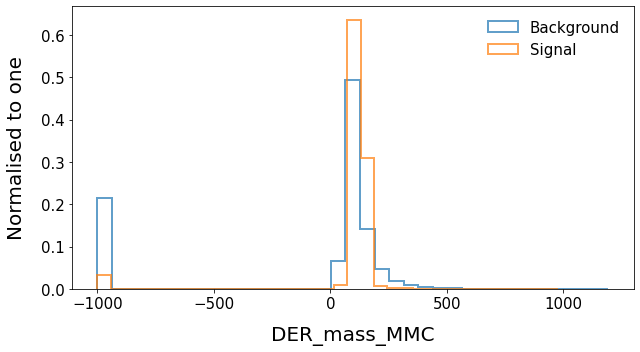

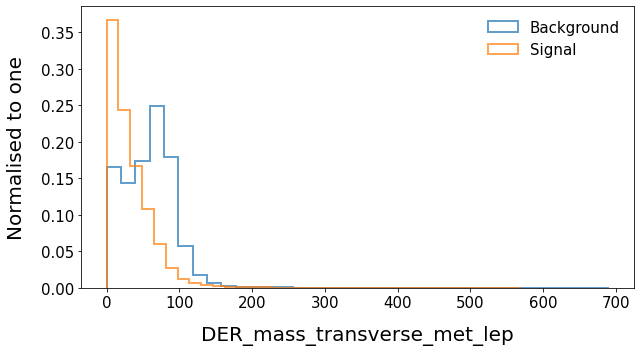

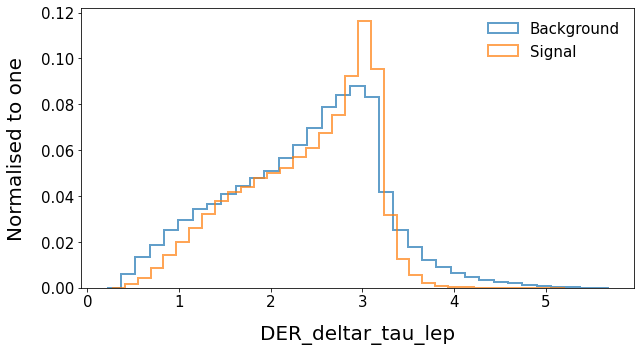

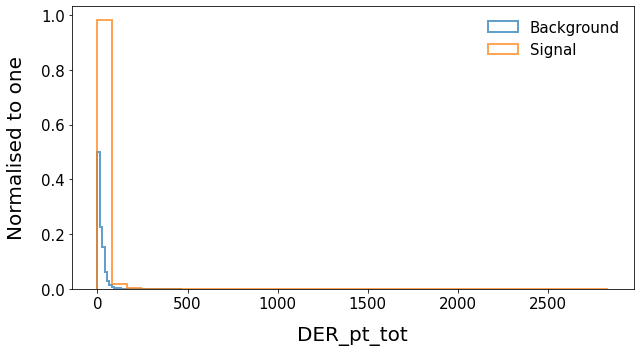

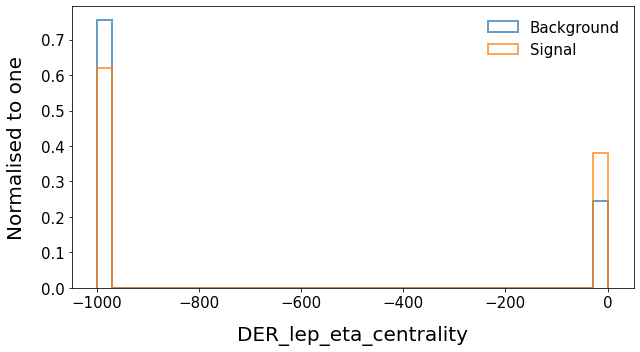

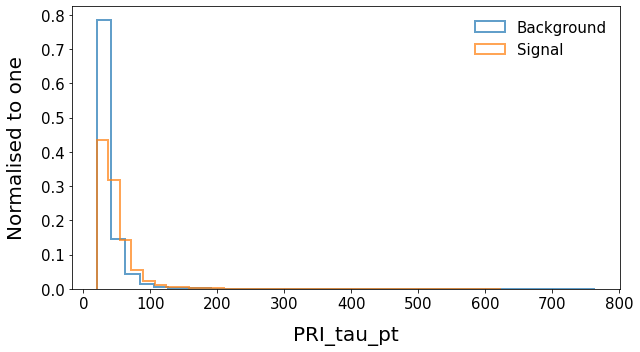

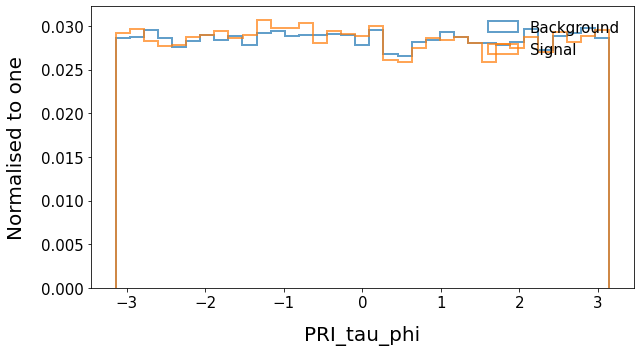

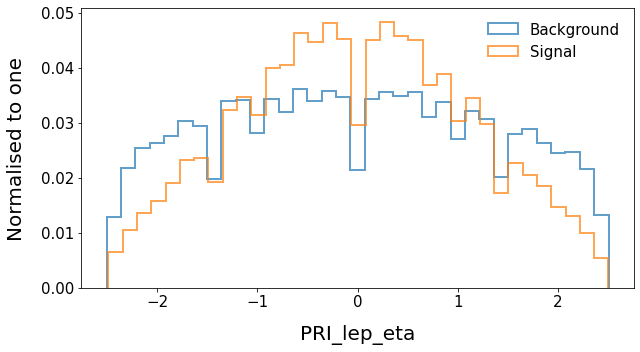

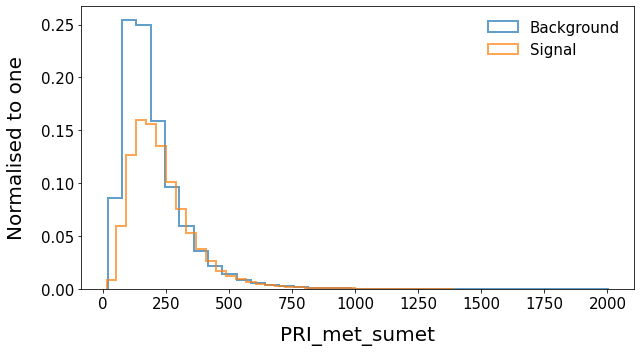

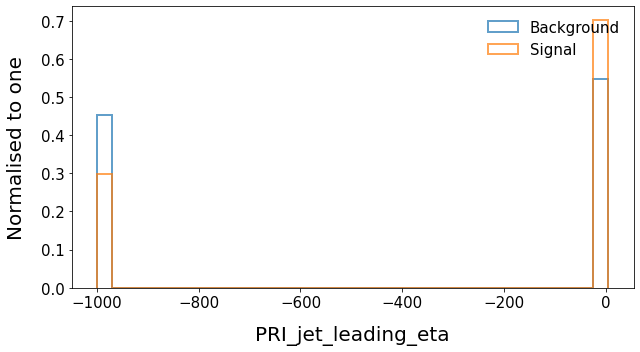

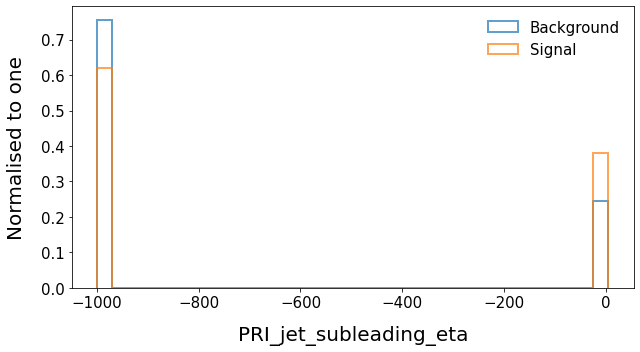

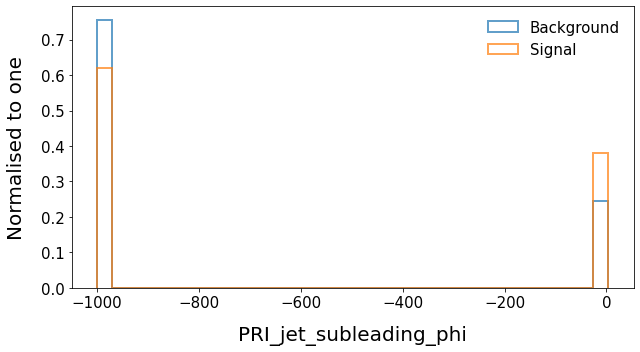

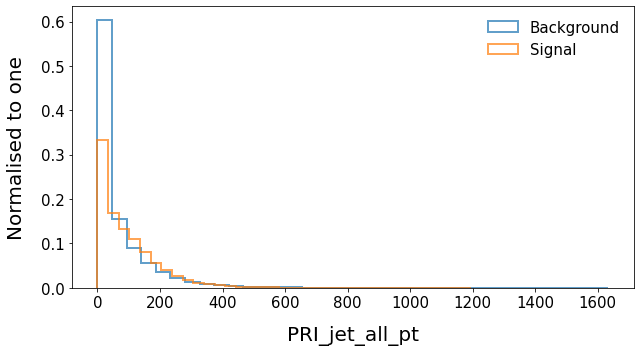

In [11]:
draw('DER_mass_MMC')
draw('DER_mass_transverse_met_lep')
draw('DER_mass_vis')
draw('DER_pt_h')
draw('DER_deltaeta_jet_jet')
draw('DER_mass_jet_jet')
draw('DER_prodeta_jet_jet')
draw('DER_deltar_tau_lep')
draw('DER_pt_tot')
draw('DER_sum_pt')
draw('DER_pt_ratio_lep_tau')
draw('DER_met_phi_centrality')
draw('DER_lep_eta_centrality')
draw('PRI_tau_pt')
draw('PRI_tau_eta')
draw('PRI_tau_phi')
draw('PRI_lep_pt')
draw('PRI_lep_eta')
draw('PRI_lep_phi')
draw('PRI_met')
draw('PRI_met_phi')
draw('PRI_met_sumet')
draw('PRI_jet_num')
draw('PRI_jet_leading_pt')
draw('PRI_jet_leading_eta')
draw('PRI_jet_leading_phi')
draw('PRI_jet_subleading_pt')
draw('PRI_jet_subleading_eta')
draw('PRI_jet_subleading_phi')
draw('PRI_jet_all_pt')

In [12]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Condition to keep rows where all numeric values are >= -10
condition = (df[numeric_cols] >= -15).all(axis=1)

# Apply the condition to filter the DataFrame
filtered_df = df[condition]

In [13]:
filtered_df

Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0               s       138.470                       51.655        97.827   
5               b        89.744                       13.550        59.149   
6               s       148.754                       28.862       107.782   
11              b       114.744                       10.286        75.712   
23              s       141.481                        0.736       111.581   
...           ...           ...                          ...           ...   
249976          s       137.371                        4.640        92.603   
249980          s       119.934                       20.078        88.751   
249985          s       126.151                       29.023        95.258   
249993          s       130.075                        3.918        66.781   
249994          b       217.020                       47.156        62.824   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0         27.980                 0.910           124.711                2.666   
5        116.344                 2.636           284.584               -0.540   
6        106.130                 0.733           158.359                0.113   
11        30.816                 2.563           252.599               -1.401   
23       174.075                 1.955           364.344               -0.923   
...          ...                   ...               ...                  ...   
249976   107.121                 3.189           322.430               -2.384   
249980    35.227                 0.660           111.491                1.836   
249985   152.684                 1.000           163.066               -0.240   
249993    77.369                 0.936           322.296               -0.207   
249994   127.953                 0.295           119.437               -0.014   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_met_phi  PRI_met_sumet  \
0                    3.064      41.928  ...       -0.277        258.733   
5                    1.362      61.619  ...        2.237        282.849   
6                    2.941       2.545  ...       -1.443        294.074   
11                   2.888      36.745  ...        2.148        290.547   
23                   1.335       6.663  ...       -0.973        454.785   
...                    ...         ...  ...          ...            ...   
249976               2.149       2.755  ...        1.408        228.186   
249980               2.800      18.532  ...        1.116        237.326   
249985               1.504      24.642  ...       -2.575        402.114   
249993               3.102      49.937  ...       -1.768        694.010   
249994               2.318       3.628  ...        0.220        271.082   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0                 2              67.435                2.150   
5                 3              90.547               -2.412   
6                 2             123.010                0.864   
11                3              76.773               -0.790   
23                2             195.533                1.156   
...             ...                 ...                  ...   
249976            2              85.132                1.991   
249980            2              69.219               -1.064   
249985            2             158.904                0.401   
249993            3             155.864               -0.358   
249994            2             141.752                0.237   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                     0.444                 46.062                   1.240   
5                    -0.653                 56.165                   0.224   
6                     1.450                 56.867                   0.131   
11                    0.303                 56.876                   1.773   
23                    1.416          

In [14]:
S = filtered_df[filtered_df['Prediction'] == 's']

B = filtered_df[filtered_df['Prediction'] == 'b']

In [17]:
def draw_filtered(feature):
   sig=S[feature]
   bkg=B[feature]
   
   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(S[feature]) / float(len(S[feature]))
   weig2 = np.ones_like(B[feature]) / float(len(B[feature]))
   
   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(bkg, bins=35, histtype='step', range=(0, bkg.max()), label=r'Background', alpha=.7, linewidth=2)
   ax.hist(sig, bins=35, histtype='step', range=(0, sig.max()), label=r'Signal', alpha=.7, linewidth=2)


   plt.ylabel('Normalised to one', fontsize=20, labelpad=15)
   plt.xlabel(feature, fontsize=20, labelpad=15)
   plt.xticks(fontsize=15, rotation=0)
   plt.yticks(fontsize=15)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(fontsize=15, loc='best', frameon=False)
#    plt.savefig(feature+'.pdf')
   plt.show()

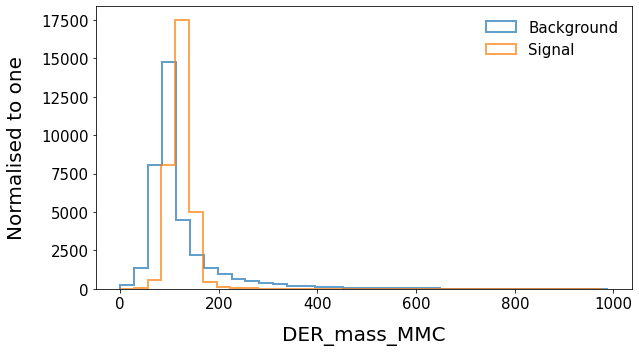

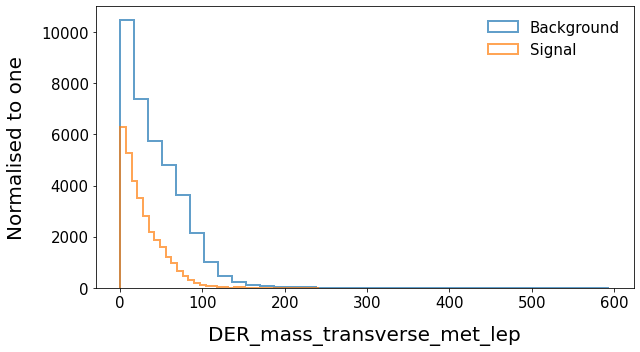

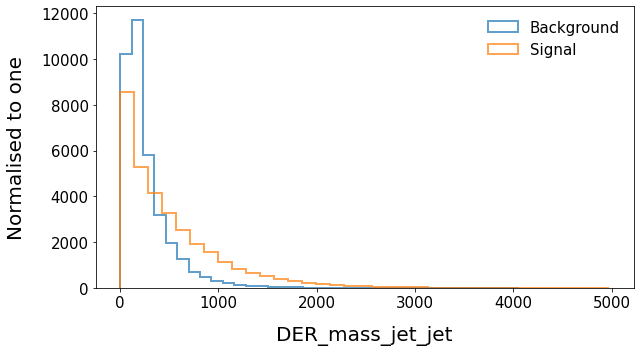

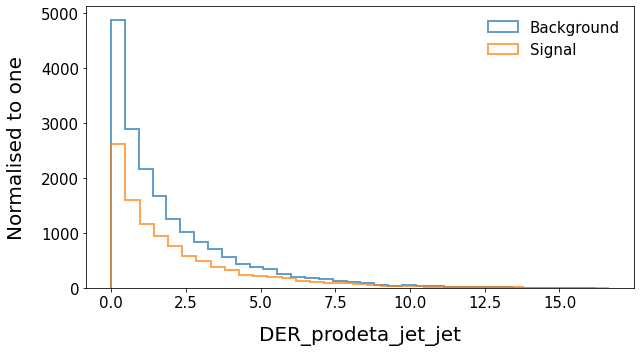

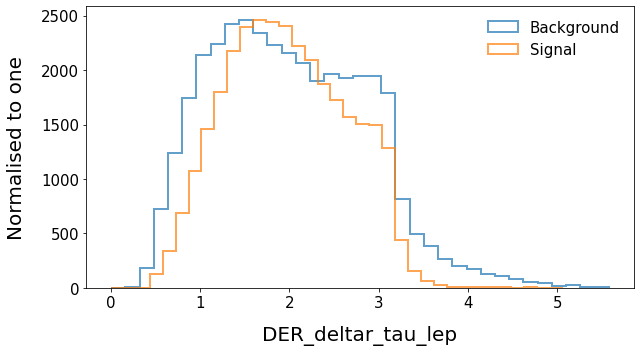

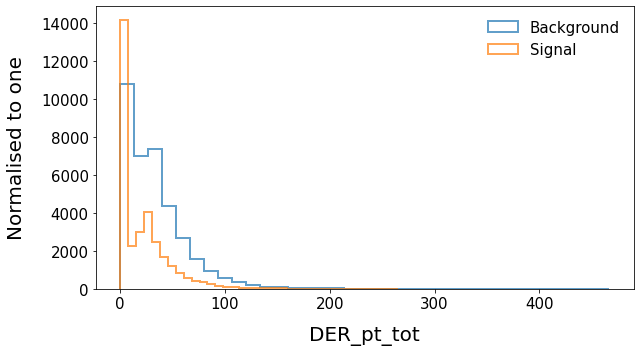

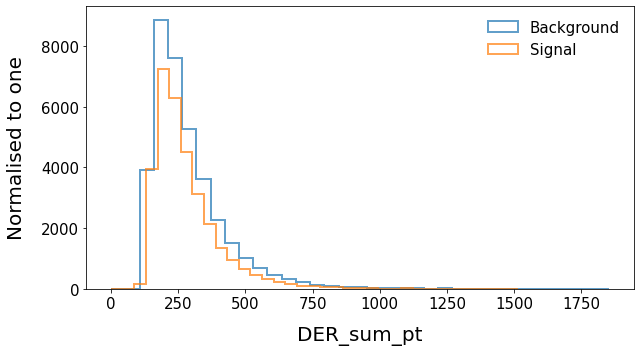

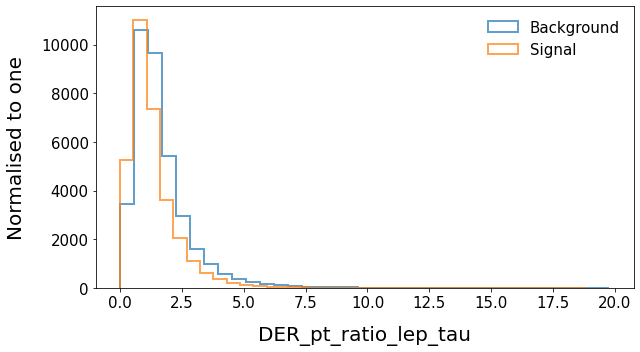

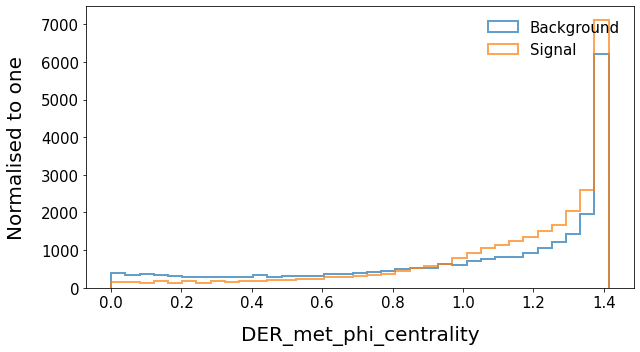

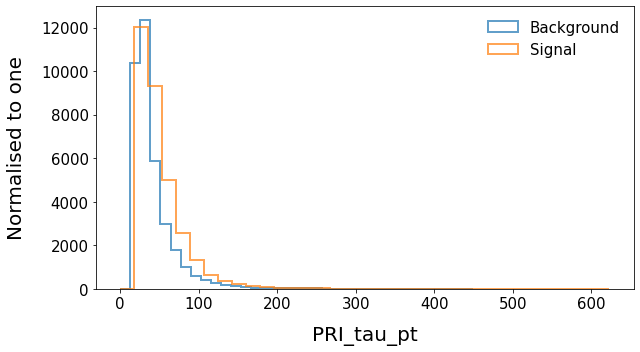

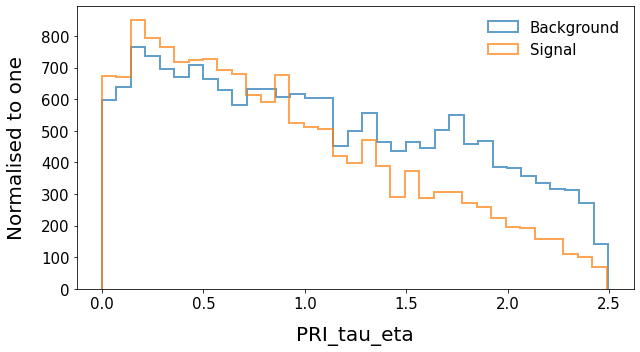

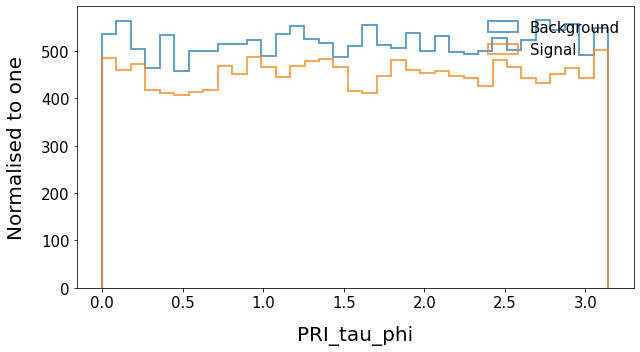

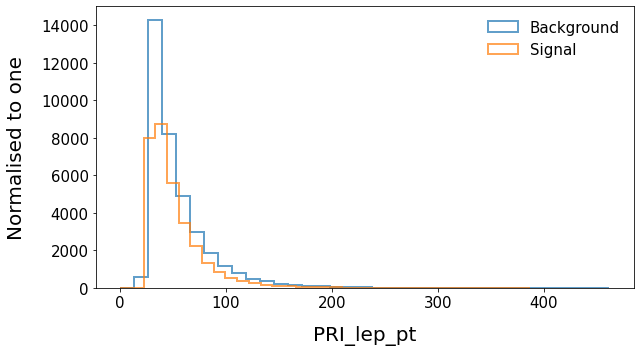

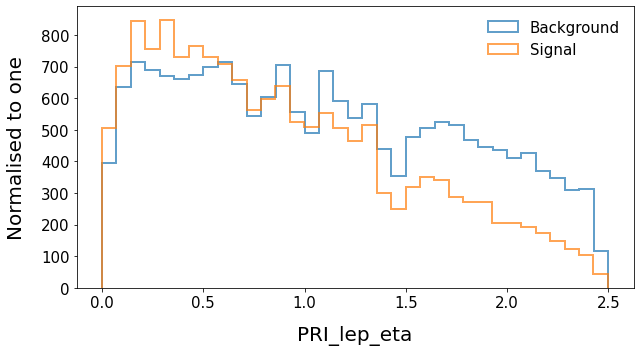

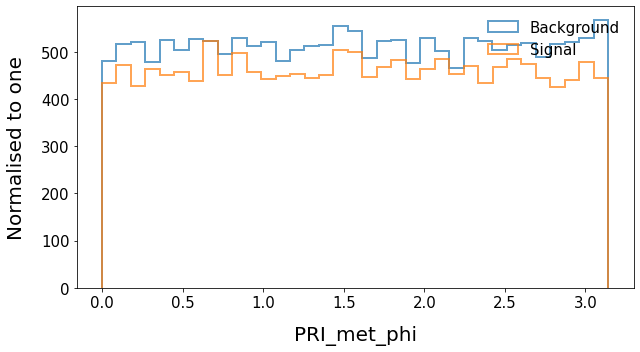

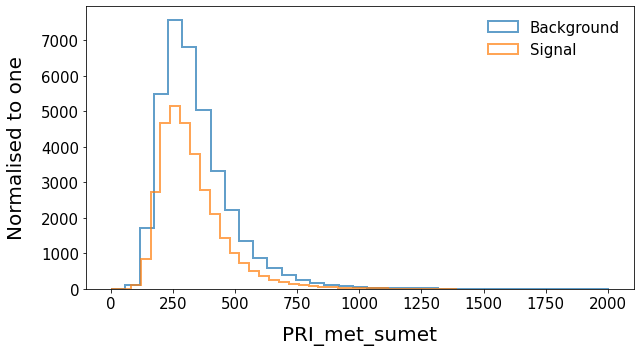

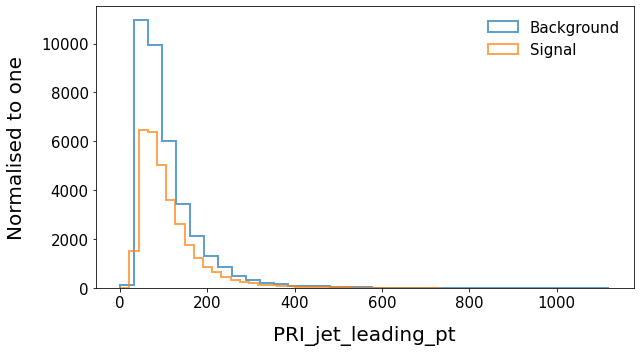

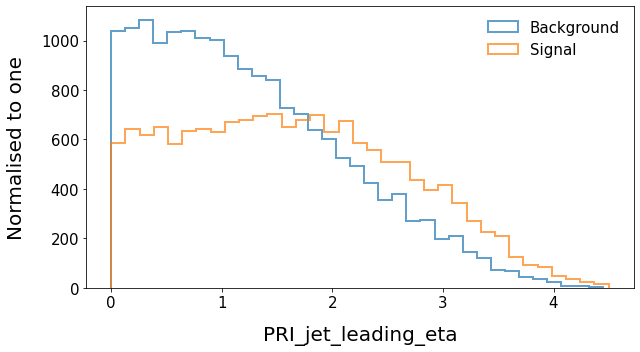

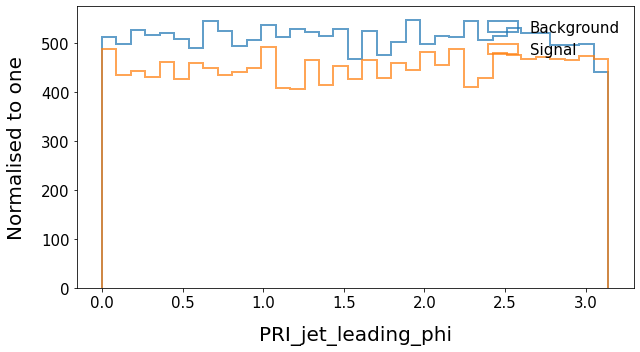

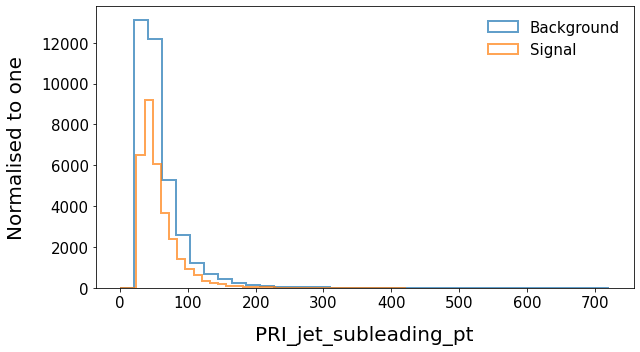

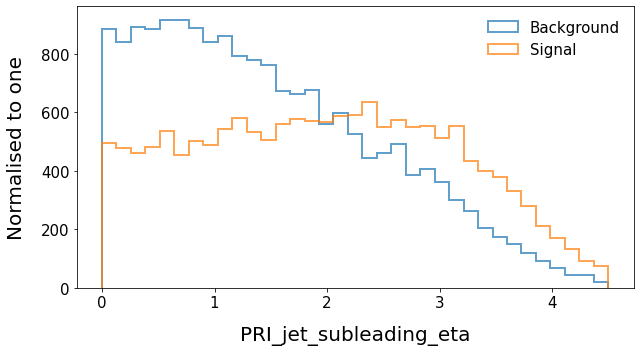

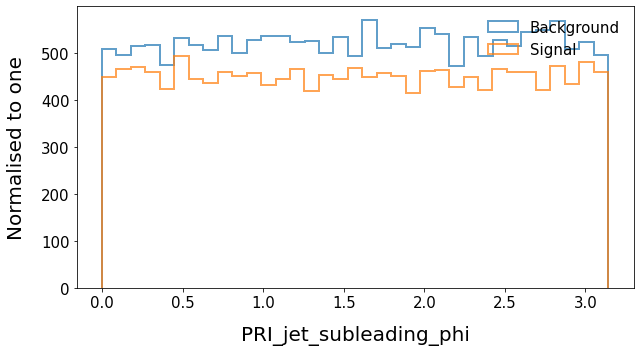

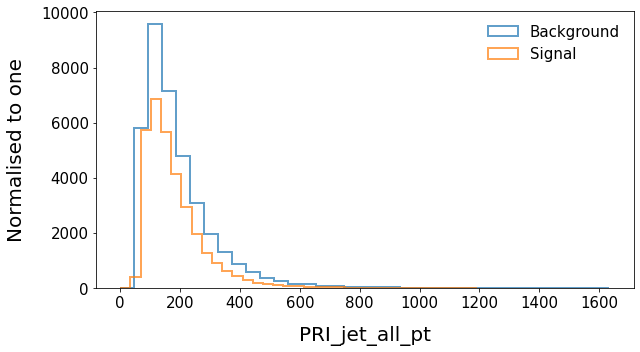

In [18]:
draw_filtered('DER_mass_MMC')
draw_filtered('DER_mass_transverse_met_lep')
draw_filtered('DER_mass_vis')
draw_filtered('DER_pt_h')
draw_filtered('DER_deltaeta_jet_jet')
draw_filtered('DER_mass_jet_jet')
draw_filtered('DER_prodeta_jet_jet')
draw_filtered('DER_deltar_tau_lep')
draw_filtered('DER_pt_tot')
draw_filtered('DER_sum_pt')
draw_filtered('DER_pt_ratio_lep_tau')
draw_filtered('DER_met_phi_centrality')
draw_filtered('DER_lep_eta_centrality')
draw_filtered('PRI_tau_pt')
draw_filtered('PRI_tau_eta')
draw_filtered('PRI_tau_phi')
draw_filtered('PRI_lep_pt')
draw_filtered('PRI_lep_eta')
draw_filtered('PRI_lep_phi')
draw_filtered('PRI_met')
draw_filtered('PRI_met_phi')
draw_filtered('PRI_met_sumet')
draw_filtered('PRI_jet_num')
draw_filtered('PRI_jet_leading_pt')
draw_filtered('PRI_jet_leading_eta')
draw_filtered('PRI_jet_leading_phi')
draw_filtered('PRI_jet_subleading_pt')
draw_filtered('PRI_jet_subleading_eta')
draw_filtered('PRI_jet_subleading_phi')
draw_filtered('PRI_jet_all_pt')

Feature rankings:
                        Feature  Ranking
0                  DER_mass_MMC        1
2                  DER_mass_vis        2
4          DER_deltaeta_jet_jet        3
5              DER_mass_jet_jet        4
1   DER_mass_transverse_met_lep        5
11       DER_met_phi_centrality        6
12       DER_lep_eta_centrality        7
13                   PRI_tau_pt        8
6           DER_prodeta_jet_jet        9
7            DER_deltar_tau_lep       10
8                    DER_pt_tot       11
19                      PRI_met       12
3                      DER_pt_h       13
10         DER_pt_ratio_lep_tau       14
21                PRI_met_sumet       15
29               PRI_jet_all_pt       16
14                  PRI_tau_eta       17
9                    DER_sum_pt       18
17                  PRI_lep_eta       19
16                   PRI_lep_pt       20
27       PRI_jet_subleading_eta       21
26        PRI_jet_subleading_pt       22
24          PRI_jet_leading_eta       2

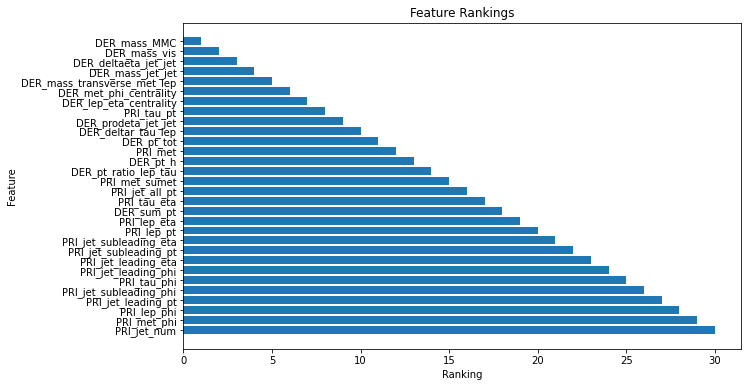

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train, Y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a DataFrame for visualization
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

# Sort the DataFrame by ranking
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Display the feature rankings
print("Feature rankings:")
print(feature_ranking)

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Rankings')
plt.gca().invert_yaxis()
plt.show()


In [19]:
# Convert 'Prediction' column values: 's' to 1 and 'b' to 0
filtered_df['Prediction'] = filtered_df['Prediction'].replace({'s': 1, 'b': 0})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
filtered_df

Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0                1       138.470                       51.655        97.827   
5                0        89.744                       13.550        59.149   
6                1       148.754                       28.862       107.782   
11               0       114.744                       10.286        75.712   
23               1       141.481                        0.736       111.581   
...            ...           ...                          ...           ...   
249976           1       137.371                        4.640        92.603   
249980           1       119.934                       20.078        88.751   
249985           1       126.151                       29.023        95.258   
249993           1       130.075                        3.918        66.781   
249994           0       217.020                       47.156        62.824   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0         27.980                 0.910           124.711                2.666   
5        116.344                 2.636           284.584               -0.540   
6        106.130                 0.733           158.359                0.113   
11        30.816                 2.563           252.599               -1.401   
23       174.075                 1.955           364.344               -0.923   
...          ...                   ...               ...                  ...   
249976   107.121                 3.189           322.430               -2.384   
249980    35.227                 0.660           111.491                1.836   
249985   152.684                 1.000           163.066               -0.240   
249993    77.369                 0.936           322.296               -0.207   
249994   127.953                 0.295           119.437               -0.014   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_met_phi  PRI_met_sumet  \
0                    3.064      41.928  ...       -0.277        258.733   
5                    1.362      61.619  ...        2.237        282.849   
6                    2.941       2.545  ...       -1.443        294.074   
11                   2.888      36.745  ...        2.148        290.547   
23                   1.335       6.663  ...       -0.973        454.785   
...                    ...         ...  ...          ...            ...   
249976               2.149       2.755  ...        1.408        228.186   
249980               2.800      18.532  ...        1.116        237.326   
249985               1.504      24.642  ...       -2.575        402.114   
249993               3.102      49.937  ...       -1.768        694.010   
249994               2.318       3.628  ...        0.220        271.082   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0                 2              67.435                2.150   
5                 3              90.547               -2.412   
6                 2             123.010                0.864   
11                3              76.773               -0.790   
23                2             195.533                1.156   
...             ...                 ...                  ...   
249976            2              85.132                1.991   
249980            2              69.219               -1.064   
249985            2             158.904                0.401   
249993            3             155.864               -0.358   
249994            2             141.752                0.237   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                     0.444                 46.062                   1.240   
5                    -0.653                 56.165                   0.224   
6                     1.450                 56.867                   0.131   
11                    0.303                 56.876                   1.773   
23                    1.41

Since we have two labels, signal and background, we can check how much data we have for each class:

In [20]:
filtered_df[filtered_df['Prediction'] == 0].shape, filtered_df[filtered_df['Prediction'] == 1].shape 

((36219, 31), (31852, 31))

Now we can split our data into trianing and testing, with 70% training and 30% testing:

In [26]:
X = filtered_df.drop('Prediction', axis=1)
Y = filtered_df['Prediction']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Feature Ranking 

Feature importances:
                        Feature  Importance
0                  DER_mass_MMC    0.219007
2                  DER_mass_vis    0.080369
4          DER_deltaeta_jet_jet    0.049976
6           DER_prodeta_jet_jet    0.045983
12       DER_lep_eta_centrality    0.045835
1   DER_mass_transverse_met_lep    0.043507
5              DER_mass_jet_jet    0.039920
11       DER_met_phi_centrality    0.037936
7            DER_deltar_tau_lep    0.037399
13                   PRI_tau_pt    0.032978
8                    DER_pt_tot    0.030797
19                      PRI_met    0.026743
3                      DER_pt_h    0.025616
10         DER_pt_ratio_lep_tau    0.022394
21                PRI_met_sumet    0.018325
14                  PRI_tau_eta    0.018139
17                  PRI_lep_eta    0.017695
16                   PRI_lep_pt    0.017520
26        PRI_jet_subleading_pt    0.017368
29               PRI_jet_all_pt    0.017179
27       PRI_jet_subleading_eta    0.017104
9          

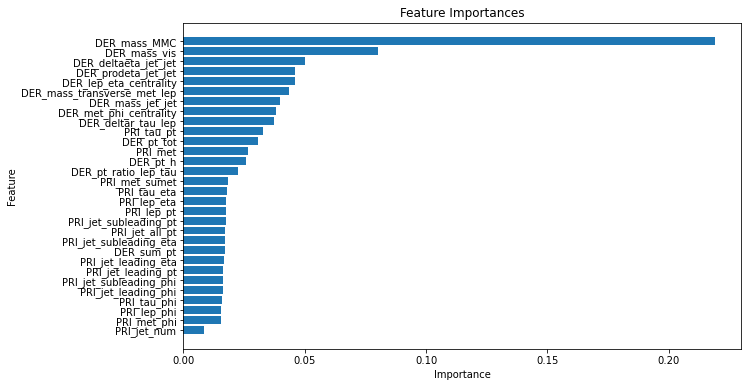

In [24]:
from sklearn.ensemble import RandomForestClassifier


# Assuming 'Prediction' is your target variable and rest are features
X = filtered_df.drop(columns=['Prediction'])  # Drop 'Id' and 'Prediction' columns
y = filtered_df['Prediction']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature importances:")
print(feature_importances)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


As seen in the above cells, one of the variables that constitute a DNN is an initializers. Theres plenty of them, but we will use these five for now:

In [29]:
initializer = tf.keras.initializers.RandomNormal()
initializer1 = tf.keras.initializers.HeUniform()
initializer2 = tf.keras.initializers.GlorotNormal()
initializer3 = tf.keras.initializers.GlorotUniform()
initializer4 = tf.keras.initializers.HeNormal()
initializer5 = tf.keras.initializers.RandomUniform()

Build your DNN model:

In [30]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=30,kernel_initializer=initializer4))
model.add(Dense(35, kernel_initializer=initializer,activation='relu'))
model.add(Dense(49, kernel_initializer=initializer,activation='relu'))
model.add(Dense(28, kernel_initializer=initializer,activation='relu'))
model.add(Dense(13, kernel_initializer=initializer,activation='relu'))
model.add(Dense(10, kernel_initializer=initializer,activation='relu'))
model.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.0009),metrics=['accuracy'])

2024-06-03 08:49:09.217479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/thuso/Documents/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/home/thuso/Documents/root/lib/:
2024-06-03 08:49:09.217511: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-03 08:49:09.217533: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thuso-thinkpad-t15-gen-1): /proc/driver/nvidia/version does not exist
2024-06-03 08:49:09.218081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

Then you can train your DNN as follows:

In [31]:
history = model.fit(X_train,Y_train,epochs=30,batch_size=10,verbose=1,validation_split=0.3,shuffle=True)

Epoch 1/30
3336/3336 [==============================] - 5s 1ms/step - loss: 0.5505 - accuracy: 0.7198 - val_loss: 0.5290 - val_accuracy: 0.7332
Epoch 2/30
3336/3336 [==============================] - 4s 1ms/step - loss: 0.5145 - accuracy: 0.7462 - val_loss: 0.5085 - val_accuracy: 0.7467
Epoch 3/30
3336/3336 [==============================] - 4s 1ms/step - loss: 0.5007 - accuracy: 0.7568 - val_loss: 0.4937 - val_accuracy: 0.7624
Epoch 4/30
3336/3336 [==============================] - 5s 1ms/step - loss: 0.4875 - accuracy: 0.7647 - val_loss: 0.4781 - val_accuracy: 0.7715
Epoch 5/30
3336/3336 [==============================] - 5s 1ms/step - loss: 0.4708 - accuracy: 0.7755 - val_loss: 0.4686 - val_accuracy: 0.7734
Epoch 6/30
3336/3336 [==============================] - 4s 1ms/step - loss: 0.4469 - accuracy: 0.7924 - val_loss: 0.4265 - val_accuracy: 0.8072
Epoch 7/30
3336/3336 [==============================] - 4s 1ms/step - loss: 0.4273 - accuracy: 0.8043 - val_loss: 0.4136 - val_accuracy:

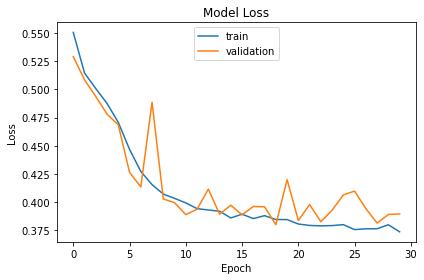

In [32]:
plt.plot(history.history['loss'],"-")
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
plt.show()

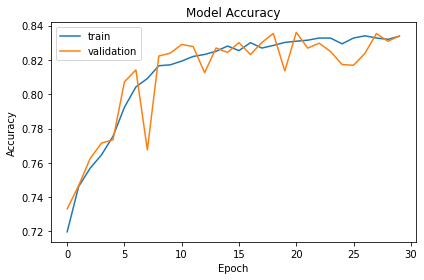

In [33]:
plt.plot(history.history['accuracy'],"-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
plt.show()

In [34]:
pred_train= model.predict(X_train)
pred_train= list(chain.from_iterable(pred_train)) 

scores= model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
pred_test= list(chain.from_iterable(pred_test)) 

scoresS2 = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1], 1 - scoresS2[1]))    

1490/1490 [==============================] - 1s 630us/step
Accuracy on training data: 0.8367016911506653% 
 Error on training data: 0.16329830884933472
639/639 [==============================] - 0s 638us/step
Accuracy on test data: 0.832190752029419% 
 Error on test data: 0.16780924797058105


In [35]:
# Function to retrieve model results
def function1(label, probs):
    # Convert label to a numpy array
    label = np.array(label)
    sig = []
    bkg = []
    for i in range(len(probs)):
        if label[i] == 1:
            sig.append(probs[i])
        elif label[i] == 0:
            bkg.append(probs[i])
    return sig, bkg

In [36]:
sig_training,bkg_training = function1(Y_train, pred_train)

In [37]:
sig_testing,bkg_testing = function1(Y_test, pred_test)

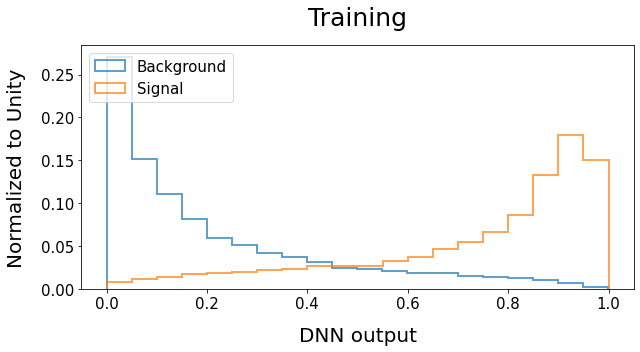

In [38]:
rng = np.random.default_rng(seed=123)

wei20 = np.ones_like(sig_training) / float(len(sig_training))
wei21 = np.ones_like(bkg_training) / float(len(bkg_training))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bkg_training, weights=wei21, bins=20,  histtype='step', linewidth=2, alpha=0.7, label='Background')
ax.hist(sig_training, weights=wei20, bins=20,  histtype='step', linewidth=2, alpha=0.7, label='Signal')

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=20, labelpad=15)
plt.xlabel('DNN output', fontsize=20, labelpad=15)
plt.title('Training', fontsize=25, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.show()

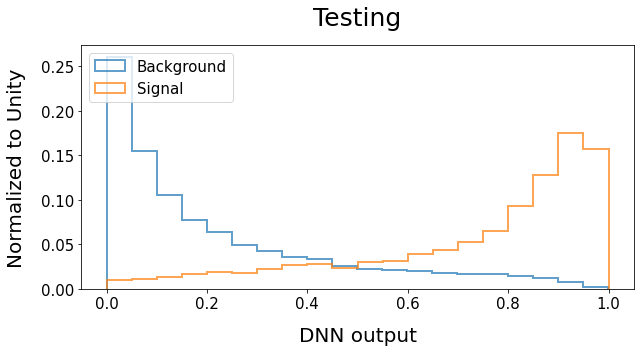

In [39]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = np.ones_like(sig_testing) / float(len(sig_testing))
wei21t = np.ones_like(bkg_testing) / float(len(bkg_testing))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bkg_testing, weights=wei21t, bins=20, histtype='step', linewidth=2, alpha=0.7, label='Background')
ax.hist(sig_testing, weights=wei20t, bins=20, histtype='step', linewidth=2, alpha=0.7, label='Signal')

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=20, labelpad=15)
plt.xlabel('DNN output', fontsize=20, labelpad=15)
plt.title('Testing', fontsize=25, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)

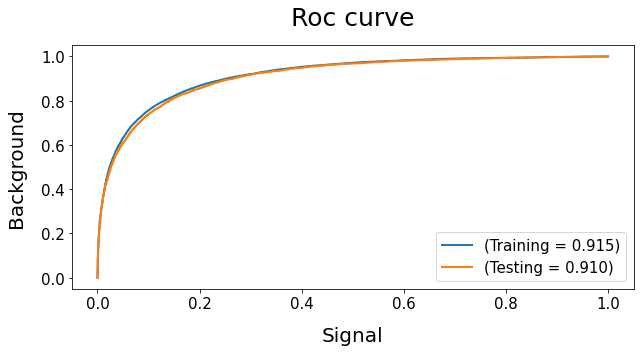

In [41]:
from matplotlib.lines import Line2D

auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

fig, ax = plt.subplots(figsize=(9,5))


ax.plot(fpr_Train, tpr_Train,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train, tpr_Train)))
ax.plot(fpr_Test, tpr_Test,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test, tpr_Test)))

# Add annotations
plt.ylabel('Background', fontsize=20, labelpad=15)
plt.xlabel('Signal', fontsize=20, labelpad=15)
plt.title('Roc curve', fontsize=25, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

# Unseen Data to the model: 

In [42]:
dg = pd.read_csv('test.csv')

In [43]:
dg

Id Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  \
0       350000          ?      -999.000                       79.589   
1       350001          ?       106.398                       67.490   
2       350002          ?       117.794                       56.226   
3       350003          ?       135.861                       30.604   
4       350004          ?        74.159                       82.772   
...        ...        ...           ...                          ...   
568233  918233          ?       105.668                       46.443   
568234  918234          ?        99.294                       30.097   
568235  918235          ?       108.497                        9.837   
568236  918236          ?        96.711                       20.006   
568237  918237          ?        92.373                       80.109   

        DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
0             23.916     3.036              -999.000          -999.000   
1             87.949    49.994              -999.000          -999.000   
2             96.358     4.137              -999.000          -999.000   
3             97.288     9.104              -999.000          -999.000   
4             58.731    89.646                 1.347           536.663   
...              ...       ...                   ...               ...   
568233        60.048   156.191                 0.403            47.746   
568234        62.713    65.861                 3.312           471.319   
568235        65.149    18.006              -999.000          -999.000   
568236        66.942    29.761              -999.000          -999.000   
568237        77.619     3.984              -999.000          -999.000   

        DER_prodeta_jet_jet  DER_deltar_tau_lep  ...  PRI_met_phi  \
0                  -999.000               0.903  ...        2.022   
1                  -999.000               2.048  ...       -1.138   
2                  -999.000               2.755  ...       -1.868   
3                  -999.000               2.811  ...        1.172   
4                    -0.339               1.028  ...       -0.231   
...                     ...                 ...  ...          ...   
568233                0.936               1.279  ...        2.273   
568234               -2.611               2.294  ...        1.541   
568235             -999.000               2.742  ...       -2.064   
568236             -999.000               2.479  ...       -0.511   
568237             -999.000               2.486  ...        0.234   

        PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0              98.556            0            -999.000             -999.000   
1             176.251            1              47.575               -0.553   
2             111.505            0            -999.000             -999.000   
3             164.707            0            -999.000             -999.000   
4             869.614            3             254.085               -1.013   
...               ...          ...                 ...                  ...   
568233        303.668            2             112.264                1.190   
568234        266.919            2             108.698                1.293   
568235        188.648            0            -999.000             -999.000   
568236        212.565            1              30.863                1.460   
568237         97.379            0            -999.000             -999.000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                  -999.000               -999.000                -999.000   
1                    -0.849               -999.000                -999.000   
2                  -999.000               -999.000                -999.000   
3                  -999.000               -999.000                -999.000   
4                    -0.334                185.857                   0.335   
...         

In [50]:
x_test = dg.drop('Prediction', axis=1)

In [52]:
x_test = x_test.drop('Id', axis=1)

In [54]:
yhat = history.model.predict(x_test)

  225/17758 [..............................] - ETA: 11s

2024-06-03 09:00:16.402251: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 136377120 exceeds 10% of free system memory.


17758/17758 [==============================] - 12s 689us/step


In [55]:
predicted = np.argmax(yhat, axis=1)
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

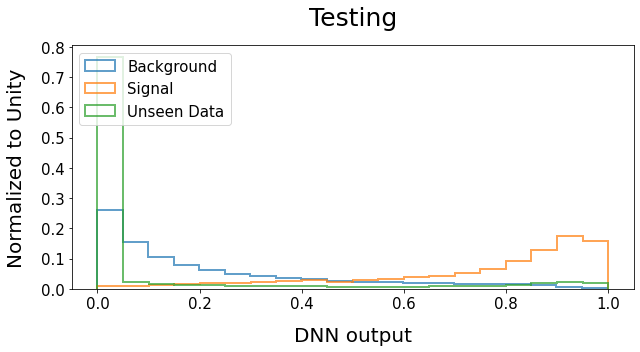

In [56]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = np.ones_like(sig_testing) / float(len(sig_testing))
wei21t = np.ones_like(bkg_testing) / float(len(bkg_testing))
uns = np.ones_like(yhat) / float(len(yhat))


fig, ax = plt.subplots(figsize=(9,5))
ax.hist(bkg_testing, weights=wei21t, bins=20, histtype='step', linewidth=2, alpha=0.7, label='Background')
ax.hist(sig_testing, weights=wei20t, bins=20, histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(yhat, weights=uns, bins=20, histtype='step', linewidth=2, alpha=0.7, label='Unseen Data')

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=20, labelpad=15)
plt.xlabel('DNN output', fontsize=20, labelpad=15)
plt.title('Testing', fontsize=25, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.show()

What we can conclude from the output distribution above is that, the unseen data contains roughly >80% background data, as our classifier classified the data closely related to the background data. 